In [1]:
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.io as pio


# Load the data
customized_report = pd.read_csv('total.csv')
normalized_data = pd.read_csv('per_student.csv')
per_sqft = pd.read_csv('per_sqft.csv')

In [2]:
main_unit = 'GHG MTCDE'

In [3]:
customized_report = customized_report[['Fiscal Year', 'Scope', 'Source', main_unit]]
normalized_data = normalized_data[['Fiscal Year', 'Scope', 'Source', main_unit]]
per_sqft = per_sqft[['Fiscal Year', 'Scope', 'Source', main_unit]]


In [4]:
print(customized_report[main_unit].dtype)
print(normalized_data[main_unit].dtypes)



object
float64


In [5]:
customized_report[main_unit] = customized_report[main_unit].str.replace(',', '').astype(float)


In [6]:
# Combine all sources with 'commuting' in their name into a single source named 'Commuting'
customized_report['Source'] = customized_report['Source'].apply(lambda x: 'Commuting' if 'commuting' in x.lower() else x)
normalized_data['Source'] = normalized_data['Source'].apply(lambda x: 'Commuting' if 'commuting' in x.lower() else x)
per_sqft['Source'] = per_sqft['Source'].apply(lambda x: 'Commuting' if 'commuting' in x.lower() else x)

# Combine all sources with 'co-gen' in their name into a single source named 'Co-gen Plant'
def combine_sources(source):
    if isinstance(source, str):
        if 'co-gen' in source.lower():
            return 'Co-gen Plant'
        else:
            return source
    else:
        return source

customized_report['Source'] = customized_report['Source'].apply(combine_sources)
normalized_data['Source'] = normalized_data['Source'].apply(combine_sources)
per_sqft['Source'] = per_sqft['Source'].apply(combine_sources)



In [7]:
# Sum up the 'Commuting' rows for each year
customized_report = customized_report.groupby(['Fiscal Year', 'Scope', 'Source'], as_index=False)[main_unit].sum()
normalized_data = normalized_data.groupby(['Fiscal Year', 'Scope', 'Source'], as_index=False)[main_unit].sum()
per_sqft = per_sqft.groupby(['Fiscal Year', 'Scope', 'Source'], as_index=False)[main_unit].sum()


In [8]:
cleaned_totals = customized_report
cleaned_normalized = normalized_data


In [9]:
print(cleaned_totals['Fiscal Year'].dtype)

int64


In [10]:
# Replace source names in both dataframes
cleaned_totals['Source'] = cleaned_totals['Source'].replace({
    'Fertilizer & Animals': 'Fertilizer',
    'Co-gen steam': 'Co-gen Plant',
    'Direct Transportation': 'University Fleet',
    'Other On-Campus Stationary': 'Propane & Natural Gas',
    'Directly Financed Air Travel': 'Air Travel',
    'Solid Waste': 'Landfill Waste',
    'Other Directly Financed Travel': 'Bus Travel'
})
cleaned_normalized['Source'] = cleaned_normalized['Source'].replace({
    'Fertilizer & Animals': 'Fertilizer',
    'Co-gen steam': 'Co-gen Plant',
    'Direct Transportation': 'University Fleet',
    'Other On-Campus Stationary': 'Propane & Natural Gas',
    'Directly Financed Air Travel': 'Air Travel',
    'Solid Waste': 'Landfill Waste',
    'Other Directly Financed Travel': 'Bus Travel'
})
per_sqft['Source'] = per_sqft['Source'].replace({
    'Fertilizer & Animals': 'Fertilizer',
    'Co-gen steam': 'Co-gen Plant',
    'Direct Transportation': 'University Fleet',
    'Other On-Campus Stationary': 'Propane & Natural Gas',
    'Directly Financed Air Travel': 'Air Travel',
    'Solid Waste': 'Landfill Waste',
    'Other Directly Financed Travel': 'Bus Travel'
})



In [11]:
# Save the cleaned_normalized dataframe to a csv file
cleaned_normalized.to_csv('static_cleaned_normalized.csv', index=False)

# Save the cleaned_totals dataframe to a csv file
cleaned_totals.to_csv('static_cleaned_totals.csv', index=False)

# Save the per_sqft dataframe to a csv file
per_sqft.to_csv('static_per_sqft.csv', index=False)



Data is now in its simplified form

In [12]:
import pandas as pd

# Read the cleaned_normalized dataframe from a csv file
cleaned_normalized = pd.read_csv('static_cleaned_normalized.csv')

# Read the cleaned_totals dataframe from a csv file
cleaned_totals = pd.read_csv('static_cleaned_totals.csv')

per_sqft = pd.read_csv('static_per_sqft.csv')

# Print the headers of cleaned_totals dataframe
print(per_sqft.columns)

print(per_sqft['Source'].unique())

print(per_sqft['Scope'].unique())

Index(['Fiscal Year', 'Scope', 'Source', 'GHG MTCDE'], dtype='object')
['Co-gen Plant' 'University Fleet' 'Fertilizer' 'Propane & Natural Gas'
 'Purchased Electricity' 'Air Travel' 'FERA' 'Landfill Waste' 'T&D Losses'
 'Commuting' 'Bus Travel']
[1 2 3]


In [13]:
year_scope_totals = cleaned_totals.groupby(['Fiscal Year', 'Scope'])['GHG MTCDE'].sum().reset_index()


# Define color mapping for scopes
color_mapping = {
    1: '#73B7ED',  # blue
    2: '#0068C9',  # green
    3: '#FFABAB'   # red
}

# Create an area chart for the total over time, grouped by scope
total_emissions_over_time = px.area(year_scope_totals, 
                                    x='Fiscal Year', 
                                    y='GHG MTCDE', 
                                    color='Scope', 
                                    title='Scope 1 and 2 Emissions Fall While Scope 3 Rises',
                                    template='plotly_white',  # Use the white theme
                                    labels={'GHG MTCDE': 'Metric Tons CO2 Equivalent', 'Fiscal Year': 'Fiscal Year'},  # Improve axis labels
                                    color_discrete_map=color_mapping)  # Use the color mapping

# Update y-axis labels
total_emissions_over_time.update_yaxes(tickvals=[10000, 20000, 30000, 40000, 50000])


# Reverse the order of the legend
total_emissions_over_time.for_each_trace(lambda trace: trace.update(showlegend=True))

# Update the fillcolor for each trace
for trace in total_emissions_over_time.data:
    trace.fillcolor = trace.line.color
total_emissions_over_time.update_layout(legend=dict(traceorder="reversed"))


total_emissions_over_time.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
# Show the plot
total_emissions_over_time.show()

In [14]:
# Filter data for years 2021 through 2023
filtered_data = cleaned_totals[cleaned_totals['Fiscal Year'].between(2018, 2023)]
# Remove 'Fertilizer' and 'Bus Travel' sources from the data
filtered_data = filtered_data[~filtered_data['Source'].isin(['Fertilizer', 'Bus Travel'])]

# Group by 'Source' and calculate the mean for each source
source_means = filtered_data.groupby('Source')['GHG MTCDE'].mean().reset_index()

# Sort the data in descending order
source_means = source_means.sort_values(by='GHG MTCDE', ascending=True)

# Create a horizontal bar chart
fig = px.bar(source_means, 
             x='GHG MTCDE', 
             y='Source', 
             orientation='h', 
             title='Air Travel and Campus Power are the Primary Drivers of Emissions',
             labels={'GHG MTCDE': 'Average Metric Tons CO2 Equivalent', 'Source': 'Source'},
             template='plotly_white')


fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.add_annotation(
    x=1,
    y=0,
    xref="paper",
    yref="paper",
    text="Yearly averages from 2018-2023",
    showarrow=False,
    align="right",
    font=dict(
        size=12,
        color="#ffffff"
    ),
    bgcolor="#0000ff",
    opacity=0.8
)


# Show the plot
fig.show()

In [15]:
# Filter data for 'Scope 3'
scope3_normalized_data = cleaned_normalized[cleaned_normalized['Scope'] == 3]

# Group by 'Fiscal Year' and sum 'GHG MTCDE'
year_scope3_totals = scope3_normalized_data.groupby('Fiscal Year')['GHG MTCDE'].sum().reset_index()

# Define color mapping for scopes
color_mapping = {
    1: '#73B7ED',  # blue
    2: '#0068C9',  # green
    3: '#FFABAB'   # red
}

# Create an area chart for the total over time for Scope 3
scope3_emissions_over_time = px.area(year_scope3_totals, 
                                     x='Fiscal Year', 
                                     y='GHG MTCDE', 
                                     title='Scope 3 Emissions Per Student on the Rise',
                                     template='plotly_white',  # Use the white theme
                                     labels={'GHG MTCDE': 'MTCO2e Per Student', 'Fiscal Year': 'Fiscal Year'},  # Improve axis labels
                                     color_discrete_sequence=[color_mapping[3]])  # Use the color mapping for Scope 3

# Update the fillcolor for each trace
for trace in scope3_emissions_over_time.data:
    trace.fillcolor = trace.line.color

scope3_emissions_over_time.update_yaxes(tickvals=[0.5, 1, 1.5, 2, 2.5])

# Calculate percent increase since 2010
percent_increase = ((year_scope3_totals['GHG MTCDE'].iloc[-1] - year_scope3_totals['GHG MTCDE'].iloc[0]) / year_scope3_totals['GHG MTCDE'].iloc[0]) * 100

# Add annotation
scope3_emissions_over_time.add_annotation(
    x=2023,
    y=2.8,
    text=f"{percent_increase:.0f}% increase since 2010",
    showarrow=True,
    arrowhead=0,
    ax=-40,
    ay=-30
)


scope3_emissions_over_time.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Show the plot
scope3_emissions_over_time.show()

In [16]:
filtered_data = cleaned_totals[cleaned_totals['Source'].isin([ 'Air Travel'])]


# Create a plotly chart
fig = px.line(filtered_data, 
              x='Fiscal Year', 
              y='GHG MTCDE', 
              color='Source', 
              title='University Sponsored Air Travel Became More Emissions-Intensive During Pandemic',
              template='plotly_white',  # Use the dark theme
              labels={'GHG MTCDE': 'Metric Tons CO2 Equivalent', 'Fiscal Year': 'Fiscal Year'},  # Improve axis labels
              line_shape='spline',  # Use smooth lines
              render_mode='svg')  # Use SVG for sharper images

# Add markers
fig.update_traces(mode='lines+markers')

# Add an annotation
fig.add_annotation(
    x=2019.9,
    y=13700,
    text="Increase in air travel related emissions in 2020 due to less occupied flights, not increased travel.",
    showarrow=True,
    arrowhead=0,
    ax=-150,
    ay=-30,
        font=dict(
        size=10
    )
)
fig.update_layout(showlegend=False)

fig.add_annotation(
    x=2020.9,
    y=filtered_data[filtered_data['Fiscal Year'] == 2021]['GHG MTCDE'].values[0],
    text="Minimal air travel during 2021 due to pandemic",
    showarrow=True,
    arrowhead=0,
    ax=-190,
    ay=-60,
        font=dict(
        size=10
    )
)

fig.add_annotation(
    x=2023,
    y=filtered_data[filtered_data['Fiscal Year'] == 2023]['GHG MTCDE'].values[0],
    text="2023 air travel<br> surpasses<br>pre-pandemic levels",
    showarrow=True,
    arrowhead=0,
    ax=-7,
    ay=90,
        font=dict(
        size=10
    )
)


fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Show the plot
fig.show()

In [17]:
# Filter data for 'Commuting'
commuting_data = cleaned_totals[cleaned_totals['Source'] == 'Commuting']

# Create a line chart for 'Commuting' emissions over time
commuting_emissions_over_time = px.line(commuting_data, 
                                        x='Fiscal Year', 
                                        y='GHG MTCDE', 
                                        title='Commuting Emissions Captured More Accurately in Recent Years',
                                        template='plotly_white',  # Use the white theme
                                        labels={'GHG MTCDE': 'Metric Tons CO2 Equivalent', 'Fiscal Year': 'Fiscal Year'},  # Improve axis labels
                                        line_shape='spline',  # Use smooth lines
                                        render_mode='svg')  # Use SVG for sharper images
# Add an annotation for 2021 data point
commuting_emissions_over_time.add_annotation(
    x=2021,
    y=commuting_data[commuting_data['Fiscal Year'] == 2021]['GHG MTCDE'].values[0],
    text="Implementation of Commuter Behavior Survey",
    showarrow=True,
    arrowhead=0,
    ax=-150,
    ay=-60,
    font=dict(
        size=14
    )
)

# Add markers to the lines
commuting_emissions_over_time.update_traces(mode='lines+markers')


commuting_emissions_over_time.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Show the plot
commuting_emissions_over_time.show()

In [18]:
# Filter the DataFrame for Scope 1 and 2
scope1_and_2_data = per_sqft[per_sqft['Scope'].isin([1, 2])]


# Get the unique sources
unique_sources = scope1_and_2_data['Source'].unique()

# Print the unique sources
for source in unique_sources:
    print(source)



Co-gen Plant
University Fleet
Fertilizer
Propane & Natural Gas
Purchased Electricity


In [24]:
# Filter the DataFrame for 'Co-gen Plant' and 'Purchased Electricity'
filtered_data = scope1_and_2_data[scope1_and_2_data['Source'].isin(['Co-gen Plant', 'Purchased Electricity'])]

# Group by 'Fiscal Year' and sum 'GHG MTCDE'
year_totals = filtered_data.groupby('Fiscal Year')['GHG MTCDE'].sum().reset_index()

# Create a line chart for the total over time
fig = px.line(year_totals, 
              x='Fiscal Year', 
              y='GHG MTCDE', 
              title='Source EUI Has Significantly Declined Over Time',
              labels={'GHG MTCDE': 'MTCO2e Per 1000 Sq Ft', 'Fiscal Year': 'Fiscal Year'},
              template='plotly_white')

# Calculate the percent change from the first year to 2023
percent_change = ((year_totals.loc[year_totals['Fiscal Year'] == 2023, 'GHG MTCDE'].values[0] - year_totals.loc[year_totals['Fiscal Year'] == year_totals['Fiscal Year'].min(), 'GHG MTCDE'].values[0]) / year_totals.loc[year_totals['Fiscal Year'] == year_totals['Fiscal Year'].min(), 'GHG MTCDE'].values[0]) * 100

# Add an annotation to the plot
fig.add_annotation(
    x=2023,
    y=year_totals.loc[year_totals['Fiscal Year'] == 2023, 'GHG MTCDE'].values[0],
    text=f"Percent change since 2010: {percent_change:.2f}%",
    showarrow=True,
    ax=-150,
    ay=-100,
    arrowhead=0)

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Show the plot
fig.show()

# Save the figure as a PNG image
pio.write_image(fig, 'figure.png', width=800, height=600, scale=2)

In [1]:
from PIL import Image

# Open the image file
img = Image.open('logo.png')

# Create a new image with the desired background color
bg = Image.new('RGB', img.size, '#999999')

# Paste the original image onto the background image
bg.paste(img, (0,0), img)

# Save the new image
bg.save('logo_with_bg.png')

In [6]:
from PIL import Image

# Open the image file
img = Image.open('logo.png')

# Create a new image with the desired color
new_img = Image.new('RGB', img.size, '#FF4B4B')

# Create a mask using the original image
mask = Image.new('L', img.size)
mask.paste(img.split()[3])  # Paste the alpha channel into the mask

# Composite the new image and the mask
result = Image.composite(new_img, img, mask)

# Save the new image
result.save('logo_with_new_color.png')

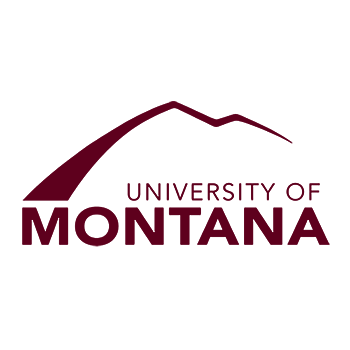

In [7]:
result